<a href="https://colab.research.google.com/github/fonslucens/test_deeplearning/blob/master/boston_housingwithregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets.boston_housing import load_data

# Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = load_data(path='boston_housing.npz', test_split=0.2, seed=113)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

57344/57026 [==============================] - 0s 0us/step


((404, 13), (404,), (102, 13), (102,))

In [3]:
type(x_train)

numpy.ndarray

In [26]:
import pandas as pd

In [27]:
df = pd.DataFrame(x_train)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       404 non-null    float64
 1   1       404 non-null    float64
 2   2       404 non-null    float64
 3   3       404 non-null    float64
 4   4       404 non-null    float64
 5   5       404 non-null    float64
 6   6       404 non-null    float64
 7   7       404 non-null    float64
 8   8       404 non-null    float64
 9   9       404 non-null    float64
 10  10      404 non-null    float64
 11  11      404 non-null    float64
 12  12      404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


In [29]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [32]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, x_test.shape

((404, 13), (102, 13))

In [33]:
df = pd.DataFrame(x_train)
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,-0.405785,-0.483615,-1.632315,-0.256833,-4.757714,-8.840465,-2.472962,-1.844587,-1.086676,-2.442692,-8.407131,-3.774506,-1.758431
std,0.108485,0.042178,0.147179,4.155563,8.546806,1.412368,0.035879,0.493781,0.115249,0.006025,0.455594,0.010652,0.138187
min,-0.449678,-0.503988,-1.862320,-1.322796,-17.316788,-14.225151,-2.557856,-2.479545,-1.198510,-2.450584,-9.623769,-3.814626,-1.968168
25%,-0.448796,-0.503988,-1.761411,-1.322796,-12.361827,-9.621144,-2.503185,-2.249097,-1.158762,-2.447288,-8.666152,-3.772255,-1.869879
50%,-0.446596,-0.503988,-1.662878,-1.322796,-6.168125,-8.976932,-2.460777,-1.990024,-1.145512,-2.445441,-8.277929,-3.770378,-1.784066
75%,-0.406611,-0.481806,-1.481154,-1.322796,0.608514,-8.160100,-2.440745,-1.509501,-0.893770,-2.433272,-8.050171,-3.769823,-1.675539
max,0.594817,-0.326528,-1.272853,15.903167,18.096614,-3.949586,-2.433169,-0.149364,-0.893770,-2.431643,-7.677477,-3.769739,-1.277858


#Model and fit

In [34]:
model = tf.keras.models.Sequential()

In [35]:
model.add(tf.keras.Input(shape=(13))) # Input layer

model.add(tf.keras.layers.Dense(64, activation='sigmoid')) # 기능 layer
model.add(tf.keras.layers.Dense(64, activation='sigmoid')) # hidden layer
model.add(tf.keras.layers.Dense(64, activation='sigmoid')) # hidden layer

model.add(tf.keras.layers.Dense(1,)) # output layer

model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

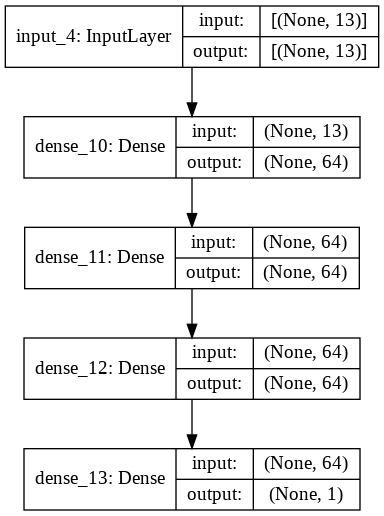

In [36]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [37]:
Model: "sequential"

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_11 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_12 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 65        
Total params: 9,281
Trainable params: 9,281
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.fit(x_train, y_train, epochs= 100)

Epoch 1/100
13/13 [==============================] - 0s 2ms/step - loss: 153.3197 - mae: 8.8074
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 84.3894 - mae: 6.7605
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 78.9997 - mae: 6.3456
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 72.1022 - mae: 6.0559
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 65.9559 - mae: 5.8021
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 61.5057 - mae: 5.5614
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 67.5830 - mae: 6.1622
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 61.4752 - mae: 5.5755
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 59.2534 - mae: 5.6078
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 49.9232 - mae: 5.0993
Epoch 11/100
13/13 [============================

loss: 17.1319 - mae: 2.8859

# evaluation

In [40]:
model.evaluate(x_train, y_train)

13/13 [==============================] - 0s 2ms/step - loss: 15.3733 - mae: 2.7344


[15.373300552368164, 2.7344272136688232]

#Service

In [44]:
x_train[10]

array([-0.33710002, -0.50398828, -1.48115445, -1.32279581,  5.1262729 ,
       -8.56801832, -2.43316853, -2.35565036, -0.89377027, -2.43327233,
       -8.05017099, -3.77209189, -1.61425073])

In [46]:
model.predict([[-0.33710002, -0.50398828, -1.48115445, -1.32279581,  5.1262729 ,
       -8.56801832, -2.43316853, -2.35565036, -0.89377027, -2.43327233,
       -8.05017099, -3.77209189, -1.61425073]])

array([[13.012915]], dtype=float32)

In [47]:
y_train[10]

12.1